# задача number джва

In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew
from statsmodels.distributions.empirical_distribution import ECDF
import math

### подготовка


In [30]:
n = 25
selection = np.random.exponential(scale=1, size=n)  # exp(-x/scale), scale=1
BOOTSTRAP_COUNT = 10000
k_BOOT = math.ceil(1 + math.log2(BOOTSTRAP_COUNT))
k = math.ceil(1 + math.log2(n))


## Пункт А
Определить по выборке:
- моду
- медиану
- размах
- оценку коэффициента асимметрии

In [31]:

MODE = selection[np.argmax(np.bincount(selection.astype(int)))]
print(f"мода💅💅: {MODE:.2f}")

MEDIAN = np.median(selection)
print(f"медиана: {MEDIAN:.2f}")

SPREAD = np.ptp(selection)  # l
print(f"размах: {SPREAD:.2f}")

SKEW = skew(selection)
print(f"ценка кафецента асеметрии: {SKEW:.2f}")

мода💅💅: 2.67
медиана: 0.60
размах: 4.11
ценка кафецента асеметрии: 1.24


## Пункт Б
Построить:
- эмпирическую функцию распределения
- гистограмму
- boxplot

Text(0.5, 1.0, 'Эмпирическая функция распределения')

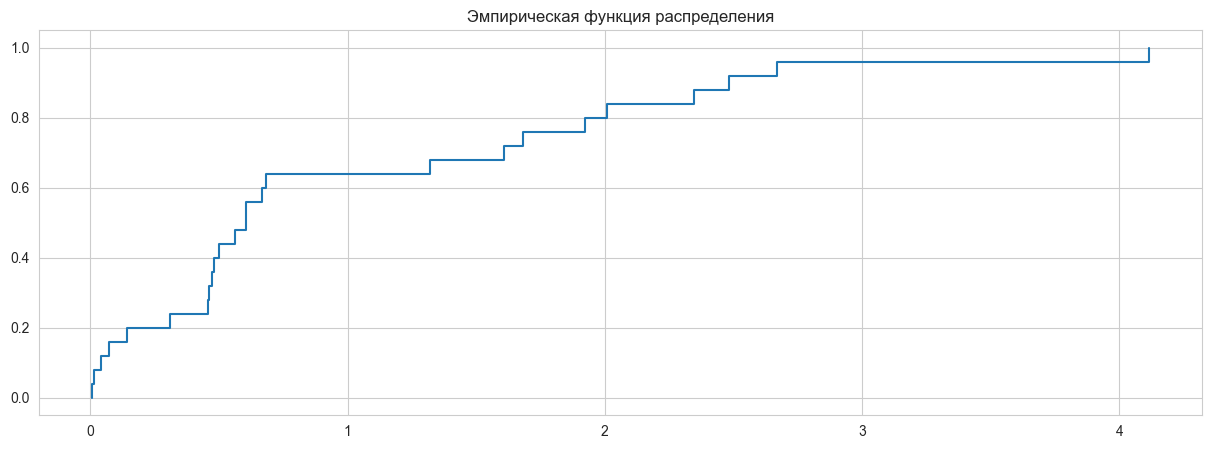

In [32]:
plt.figure(figsize=(15, 5))

# Эмпирическая функция распределения
plt.subplot(1, 1, 1)
empirical_distribution = ECDF(selection)  # Empirical cumulative distribution function of a sample.
plt.step(empirical_distribution.x, empirical_distribution.y, where="post")
plt.title("Эмпирическая функция распределения")

Text(0.5, 1.0, 'гестограмма')

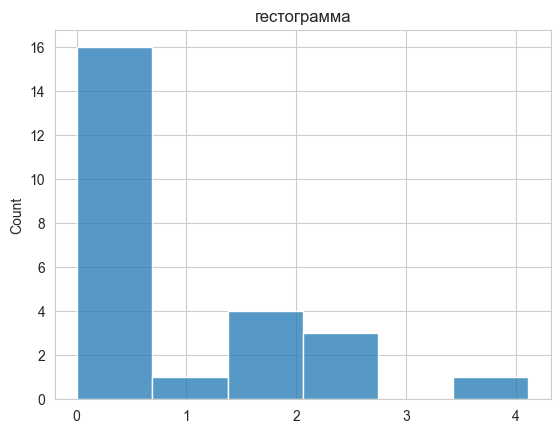

In [33]:
# Гистограмма
# delta_i = SPREAD / k
# bin_count = round(n / delta_i)
# print(delta_i, bin_count)

plt.subplot(1, 1, 1)
sns.histplot(selection, bins=math.ceil(k), kde=False)
plt.title("гестограмма")

Text(0.5, 1.0, 'КОРОЬБКА ДИАГРАММА С УСИКАМИ')

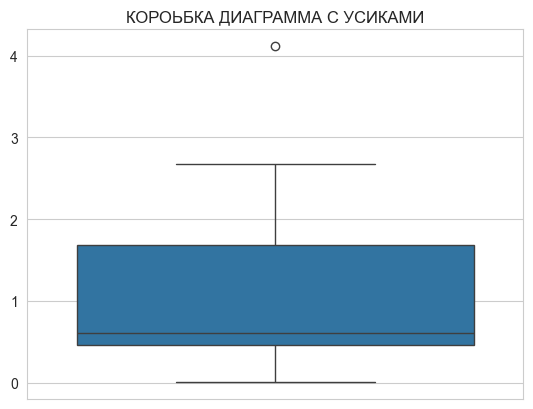

In [34]:
# Boxplot

plt.subplot(1, 1, 1)
sns.boxplot(selection)
plt.title("КОРОЬБКА ДИАГРАММА С УСИКАМИ")

## Пункт Ц
Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ, с бутстраповской оценкой этой плотности

![тут была картинка но теперь исчезла, посмотрите тогда файл "2-пункт С.pdf"](2c.png "Title")


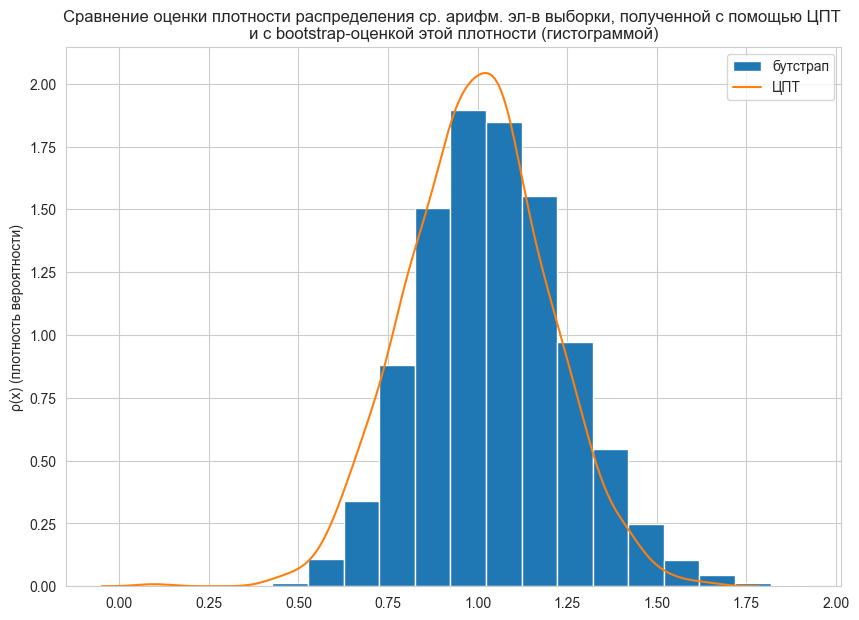

In [35]:
_, axs = plt.subplots(1, 1, figsize=(10, 7))
bootstrap_means = [np.mean(np.random.choice(selection, size=n, replace=True)) for _ in range(BOOTSTRAP_COUNT)]

axs.set_ylabel("ρ(x) (плотность вероятности)")
axs.set_title("Сравнение оценки плотности распределения ср. арифм. эл-в выборки, полученной с помощью ЦПТ \nи с bootstrap-оценкой этой плотности (гистограммой)")

axs.hist(bootstrap_means,
          bins=k_BOOT,
          density=True, label="бутстрап")
# 1/5 - сигма, с.м. приложение к файлу да
sns.kdeplot(np.random.normal(1, 1/5, size=1000), label="ЦПТ")
plt.legend()
plt.show()

## Пункт D(Д)
Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициента асимметрии будет меньше 1


	P(к/ф асеметрии бутстрапа < 1): 0.43



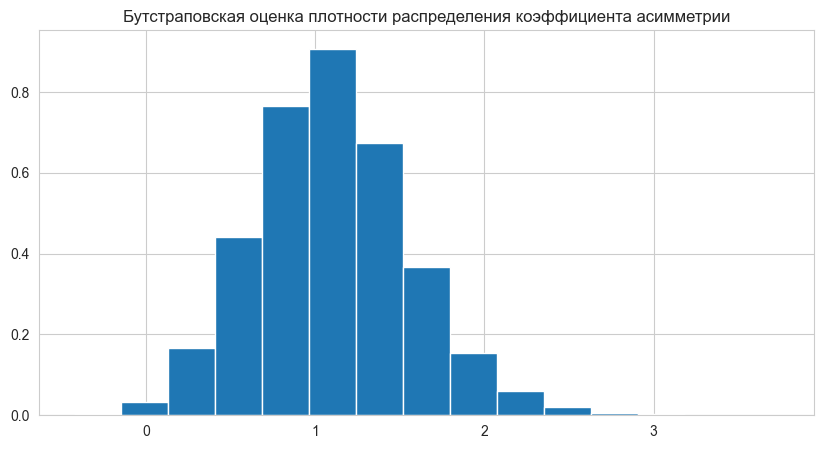

In [36]:
bootstrap_skew_data = [skew(np.random.choice(selection, size=n, replace=True)) for _ in range(BOOTSTRAP_COUNT)]
plt.figure(figsize=(10, 5))
plt.hist(bootstrap_skew_data,
          bins=k_BOOT,
          density=True, label="плотность(х)")
plt.title('Бутстраповская оценка плотности распределения коэффициента асимметрии')

probability = np.mean(np.array(bootstrap_skew_data) < 1)
print(f"\n\tP(к/ф асеметрии бутстрапа < 1): {probability:.2f}\n")

plt.show()

## Пункт E
Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности

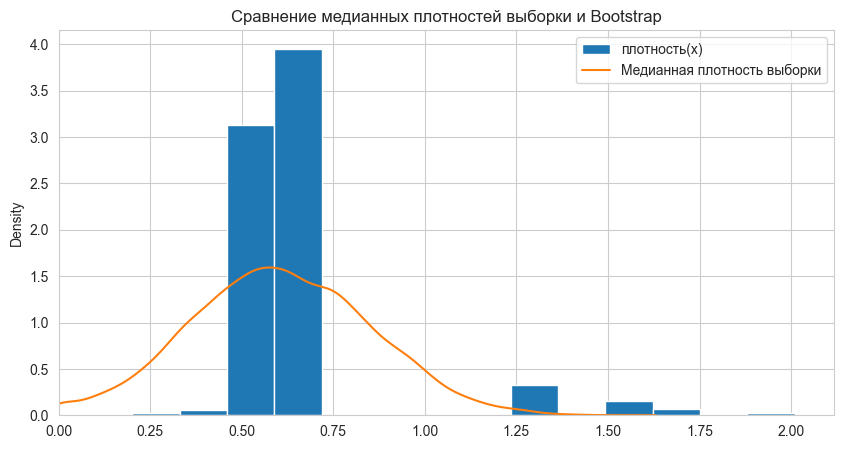

In [37]:
bootstrap_medians = [np.median(np.random.choice(selection, size=n, replace=True)) for _ in range(BOOTSTRAP_COUNT)]
plt.figure(figsize=(10, 5))
plt.hist(bootstrap_medians,
          bins=k_BOOT,
          density=True, label="плотность(х)")
#.kdeplot(bootstrap_medians, label="Медианная плотность Bootstrap")

tmp = np.random.normal(MEDIAN, np.std(bootstrap_medians), size=BOOTSTRAP_COUNT)
tmp[tmp < 0] = 0
sns.kdeplot(tmp, label="Медианная плотность выборки")
plt.legend()
plt.title("Сравнение медианных плотностей выборки и Bootstrap")
plt.xlim(xmin=0)
plt.show()

конец